In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("volume_pengangkutan_sampah.csv", sep=";")
df.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
0,1,Kali / Sungai Sentiong - Ruas Dewi Sri,Johar Baru,Jakarta Pusat,464,m,1,4
1,1,Kali / Sungai Sentiong - Ruas Abapon,Johar Baru,Jakarta Pusat,464,m,1,4
2,1,Kali / Sungai Sentiong - JL Tanah Tinggi,Johar Baru,Jakarta Pusat,464,m,1,4
3,1,Kali / Sungai Sentiong Jl.Galur - Pombensin,Johar Baru,Jakarta Pusat,606,m,1,4
4,1,Kali / Sungai Sentiong - Jl. Timah,Johar Baru,Jakarta Pusat,310,m,1,7


# Sanity Check of the Data


In [4]:
print(df.columns)

Index(['bulan', ' titik_lokasi ', ' kecamatan ', ' wilayah ', ' panjang/luas ',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')


In [5]:
#memperbaiki nama kolom
df.columns = df.columns.str.replace(' ', '', regex=False)

In [6]:
print(df.columns)

Index(['bulan', 'titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas',
       'satuan_panjang/luas', 'tanggal', 'volume_sampah_perhari(m3)'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1   titik_lokasi               54343 non-null  object
 2   kecamatan                  54343 non-null  object
 3   wilayah                    54343 non-null  object
 4   panjang/luas               53475 non-null  object
 5   satuan_panjang/luas        32388 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### Missing Value Identification

In [9]:
#mengidentifikasi persentase missing value
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

bulan                         0.000000
titik_lokasi                  0.000000
kecamatan                     0.000000
wilayah                       0.000000
panjang/luas                  1.597262
satuan_panjang/luas          40.400788
tanggal                       0.000000
volume_sampah_perhari(m3)     0.000000
dtype: float64


<Axes: >

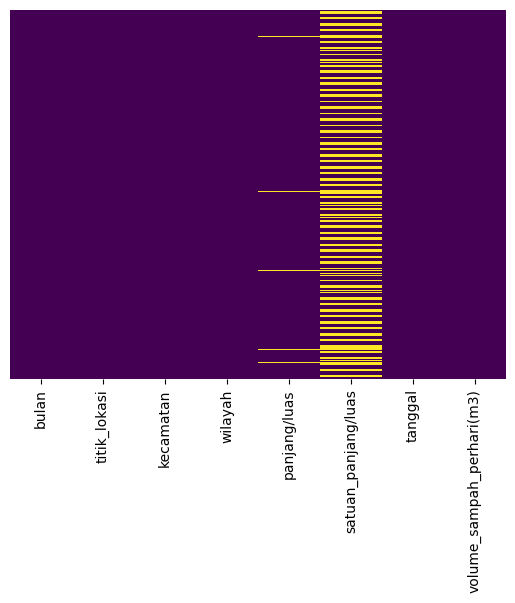

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### Noise Value Identification

##### 1. Mengidentifikasi noise value pada kolom panjang/luas

In [13]:
#mengidentifikasi noise dan garbage value pada kolom panjang/luas
df_check_pl = df['panjang/luas']
df_check_pl_float = pd.to_numeric(df_check_pl, errors='coerce')
invalid_values = df_check_pl[df_check_pl_float.isna()].unique()
print("Nilai yang tidak dapat dikonversi menjadi float:")
for value in invalid_values:
    print(value)

Nilai yang tidak dapat dikonversi menjadi float:
nan
3500/70
1400/10
1100/10
1000/10
700/10
3000/15
1000/7
700/15
1000/6
700/6
800/7
1000/8
Jun-00
Oct-00
1000/5
2000/15
May-00
1000/4
1500/10
Apr-00
700/8
800/4
1000/30
700/5
700/4
700/3
1000/3
900/5
500/6
500/10
300/3
500/5
3000/32
1000/2
200/17
500/3
500/4
500/8
600/3
600/5
2000/3.5
800/3
1500/35
1300/35
900/35
1000/35
900/10
600/4
1200/5
1500/6
1500/4
450/6
200/5
350/3
250/5
400/3
400/4
600/6
450/4
800/2
1500/3
750/35
751/35
150/3
150/5
1800/35
700/30
1000/12
250/6
200/13
800/6
400/2.5
500/1.5
1500/1.5
1000/1.5
900/6.5
900/9
600/2
600/1
200/3
50/20
200/35
900/3
200/2.5
May-50
800/16
150/2.5
500/30
750/20
500/28
800/28
700/25
500/25
350/25
800/20
150/20
650/20
1500/20
100/3.5
100/25
400/8
600/2.5
800/3.5
300/4
432/3.5
100/2.5
650/3.5
500/3.5
900/3.5
435/4
250/2.5
750/5
350/3.5
300/8
700/3.5
450/3
500/2.5
600/20
600/25
600/3.5
350/4
2000/40
1500/40
1800/40
1900/50
1400/40
1500/45
800/15
700/20
1500/50
900/20
1000/50
1000/15
900/15
1000/

In [14]:
#presentase garbage value pada kolom panjang/luas dimana berupa - dan —
df_cons_strip_pl = df[(df['panjang/luas'].str.contains('-', na=False))]
percentage_cons_strip_pl = (len(df_cons_strip_pl)/len(df['panjang/luas']))*100
print(percentage_cons_strip_pl)

0.6274957216200799


In [15]:
#presentase garbage value dimana terdapat 'm' pada value di kolom panjang/luas
df_cons_m = df[(df['panjang/luas'].str.contains('m', na=False))]
percentage_df_cons_m = (len(df_cons_m)/len(df['panjang/luas']))*100
print(percentage_df_cons_m)

0.513405590416429


In [16]:
#presentase garbage value dimana terdapat 'Ha' pada value di kolom panjang/luas
df_cons_ha = df[(df['panjang/luas'].str.contains('Ha', na=False))]
percentage_df_cons_ha = (len(df_cons_ha)/len(df['panjang/luas']))*100
print(percentage_df_cons_ha)

0.11409013120365087


In [17]:
#presentase value yang lebih dari satu pada kolom panjang/luas
df_cons_slash_pl = df[(df['panjang/luas'].str.contains('/', na=False))]
percentage_df_cons_slash_pl = (len(df_cons_slash_pl)/len(df['panjang/luas']))*100
print(percentage_df_cons_slash_pl)

21.620079863091842


##### 2. Mengidentifikasi noise value pada kolom lain yang tidak dicurigai terdapat noise value

In [19]:
#mengidentifikasi garbage value dan value yang lebih dari satu pada kolom-kolom yang tidak dicurigai
non_sus = df[
    (df['titik_lokasi'] == '-') | 
    (df['kecamatan'] == '-') | 
    (df['wilayah'] == '-') | 
    (df['satuan_panjang/luas'] == '-') | 
    (df['titik_lokasi'] == '—') |
    (df['kecamatan'] == '—') |
    (df['wilayah'] == '—') |
    (df['satuan_panjang/luas'] == '—')|
    (df['titik_lokasi'] == '/')|
    (df['kecamatan'].str.contains('/', na=False)) |
    (df['wilayah'].str.contains('/', na=False)) |
    (df['satuan_panjang/luas'].str.contains('/', na=False))
    
]
percentage_non_sus = (len(non_sus)/len(df))*100
print(percentage_non_sus)

0.0


##### 3. Mengidentifikasi noise value pada volume_sampah_perhari(m3)

In [21]:
#mengidentifikasi noise dan garbage value pada kolom panjang/luas
df_check_vsp = df['volume_sampah_perhari(m3)']
df_check_vsp_float = pd.to_numeric(df_check_vsp, errors='coerce')
invalid_values = df_check_vsp[df_check_vsp_float.isna()].unique()
print("Nilai yang tidak dapat dikonversi menjadi float:")
for value in invalid_values:
    print(value)

Nilai yang tidak dapat dikonversi menjadi float:
-
 
—
O.5


In [22]:
#mengidentifikasi garbage value pada kolom volume_sampah_perhari(m3)
df_cons_strip_vsp = df[
    (df['volume_sampah_perhari(m3)'] == '-') | 
    (df['volume_sampah_perhari(m3)'] == '—')
]
percentage_df_cons_strip_vsp = (len(df_cons_strip_vsp)/len(df['volume_sampah_perhari(m3)']))*100
print(percentage_df_cons_strip_vsp)

32.56905213182931


In [23]:
#presentase garbage value dimana value berupa spasi (' ')
df_cons_space = df[(df['volume_sampah_perhari(m3)'] == ' ')]
percentage_df_cons_space = (len(df_cons_space)/len(df['panjang/luas']))*100
print(percentage_df_cons_space)

0.005520490219531495


In [24]:
#presentase garbage value dimana value berupa O.5 dalam unidentified font
df_cons_unidentified_font = df[(df['volume_sampah_perhari(m3)'] == 'O.5')]
percentage_df_cons_unidentified_font = (len(df_cons_unidentified_font)/len(df['panjang/luas']))*100
print(percentage_df_cons_unidentified_font)

0.0018401634065104981


#### Duplicate Value Identification

In [26]:
#mengidentifikasi persentase duplicated value
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100
print(duplicate_percentage)

0.0


# Exploratory Data Analysis

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bulan,54343.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
tanggal,54343.0,16.0,8.944354,1.0,8.0,16.0,24.0,31.0


In [29]:
df.describe(include="object")

,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,volume_sampah_perhari(m3)
count,54343,54343,54343,53475,32388,54343
unique,1747,42,5,442,11,59
top,Saluran PHB Asem,Kalideres,Jakarta Barat,1000,m,-
freq,62,2914,16430,6512,29884,15649


#### panjang/luas Column Exploration

##### 1. Mengekplorasi missing value

In [32]:
#melihat missing value pada  panjang/luas
df[df['panjang/luas'].isnull()].head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
71,1,Saringan P2SC. UPK BADAN AIR,Kemayoran,Jakarta Pusat,NaN,NaN,1,2
87,1,Saringan Sumenep. UPK BADAN AIR,Menteng,Jakarta Pusat,NaN,NaN,1,1
280,1,Saringan Sampah Pulomas,Kelapa Gading,Jakarta Utara,NaN,NaN,1,12
281,1,Saringan Sampah IKIP,Kelapa Gading,Jakarta Utara,NaN,NaN,1,0
323,1,Saringan Sampah Pasar Uler,Koja,Jakarta Utara,NaN,NaN,1,1


In [33]:
#melihat lokasi yang terdapat missing value pada  panjang/luas
null_lokasi = df[df['panjang/luas'].isna()][['titik_lokasi', 'kecamatan', 'wilayah', 'satuan_panjang/luas']].drop_duplicates()
null_lokasi.head(28)

,titik_lokasi,kecamatan,wilayah,satuan_panjang/luas
71,Saringan P2SC. UPK BADAN AIR,Kemayoran,Jakarta Pusat,NaN
87,Saringan Sumenep. UPK BADAN AIR,Menteng,Jakarta Pusat,NaN
280,Saringan Sampah Pulomas,Kelapa Gading,Jakarta Utara,NaN
281,Saringan Sampah IKIP,Kelapa Gading,Jakarta Utara,NaN
323,Saringan Sampah Pasar Uler,Koja,Jakarta Utara,NaN
324,Saringan Sampah Kresek,Koja,Jakarta Utara,NaN
325,Saringan Sampah Layar,Koja,Jakarta Utara,NaN
326,Saringan Sampah Bendungan Melayu,Koja,Jakarta Utara,NaN
418,Saringan Sampah Lagoa Tirem,Tanjung Priok,Jakarta Utara,NaN
419,Saringan Sampah Waduk Sunter Selatan,Tanjung Priok,Jakarta Utara,NaN


##### 2. Mengekplorasi garbage value

In [35]:
#menampilkan semua baris dimana terdapat garbage value pada kolom panjang/luas
df_cons_strip_pl.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
170,1,PHB Tanah Merdeka,Cilincing,Jakarta Utara,Jun-00,NaN,1,0
171,1,PHB Gang Sate,Cilincing,Jakarta Utara,Oct-00,NaN,1,0
174,1,PHB Pos 5,Cilincing,Jakarta Utara,May-00,NaN,1,0
186,1,PHB Pintu Dua Pegangsaan Kel. Sukapura,Cilincing,Jakarta Utara,Apr-00,NaN,1,0
318,1,Inlet 1 Waduk Rawa Badak,Koja,Jakarta Utara,May-50,NaN,1,6


<Axes: xlabel='panjang/luas', ylabel='Count'>

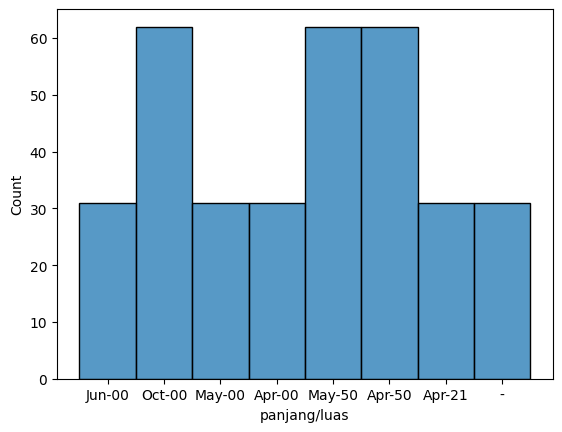

In [36]:
#melihat persebaran garbage value panjang/luas
sns.histplot(df_cons_strip_pl['panjang/luas'])

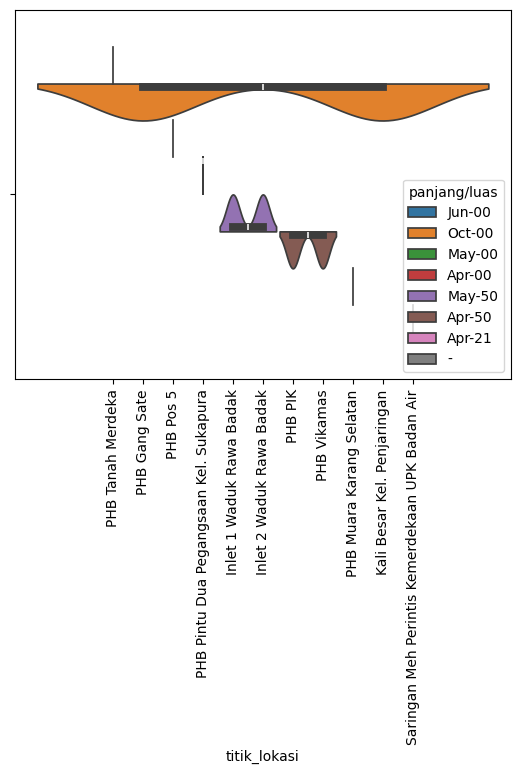

In [68]:
#melihat persebaran titik_lokasi terhadap garbage value panjang/luas
sns.violinplot(data=df_cons_strip_pl, x='titik_lokasi', hue='panjang/luas', split=True)
plt.xticks(rotation=90)
plt.show()

##### 3. Mengekplorasi noise value

In [41]:
#menampilkan semua baris dimana terdapat value yang mengandung '/' atau value lebih dari satu pada kolom panjang/luas
df_cons_slash_pl.head(11)

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
152,1,Kali BKT Marunda Pintu Air Sekatan 1,Cilincing,Jakarta Utara,3500/70,NaN,1,6
153,1,Kali BKT Marunda Pintu Air Sekatan 2,Cilincing,Jakarta Utara,1400/10,NaN,1,6
154,1,Kali Cakung Drain Sekatan 1,Cilincing,Jakarta Utara,1100/10,NaN,1,0
155,1,Kali Cakung Drain Sekatan 2,Cilincing,Jakarta Utara,1000/10,NaN,1,0
156,1,Kali Muara Cakung Drain,Cilincing,Jakarta Utara,1000/10,NaN,1,0
157,1,Kali Bangleo Kelurahan Kali Baru,Cilincing,Jakarta Utara,1000/10,NaN,1,0
158,1,Kali Sengkang Kel. Kali Baru,Cilincing,Jakarta Utara,700/10,NaN,1,0
159,1,Kali Sepatan,Cilincing,Jakarta Utara,3000/15,NaN,1,0
162,1,Kali Gendong SDN 07,Cilincing,Jakarta Utara,1000/7,NaN,1,0
163,1,Kali Gendong Pintu Air Bulak Cabe,Cilincing,Jakarta Utara,1000/10,NaN,1,0


#### satuan_panjang/luas Column Exploration

##### 1. Eksplorasi kolom

###### 1.a. Mengeksplorasi missing value

###### 1.b. Mengeksplorasi persebaran value

<Axes: xlabel='satuan_panjang/luas', ylabel='Count'>

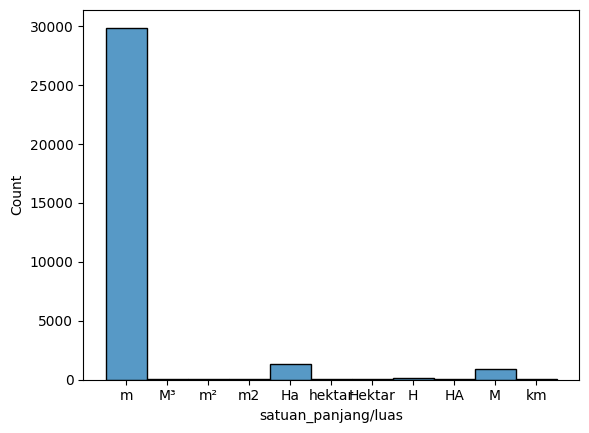

In [46]:
#melihat persebaran satuan_panjang/luas
sns.histplot(df['satuan_panjang/luas'])

In [47]:
#menambahkan kolom lokasi_penanganan_sampah, yang akan digunakan untuk mengidentifikasi pengisian missing value
df['lokasi_penanganan_sampah'] = df['titik_lokasi'].str.split(' ').str[0]

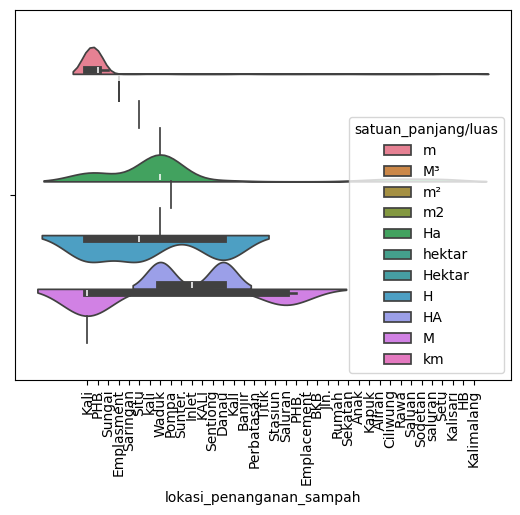

In [48]:
#melihat persebaran satuan_panjang/luas terhadap lokasi_penanganan_sampah
sns.violinplot(data=df, x='lokasi_penanganan_sampah', hue='satuan_panjang/luas', split=True)
plt.xticks(rotation=90)
plt.show()

##### 2. Pengerucutan value pada kolom

###### 2.a. Pengerucutan value pada kolom satuan_panjang/luas

In [51]:
df['satuan_panjang/luas'] = df['satuan_panjang/luas'].replace('M³', 'm3', regex=False)

In [52]:
replacement_dict = {
    'M': 'm',
    'HA': 'Ha',
    'm²': 'm2',
    'hektar': 'Ha',
    'Hektar': 'Ha'
}

df['satuan_panjang/luas'] = df['satuan_panjang/luas'].replace(replacement_dict, regex=True)

In [53]:
df['satuan_panjang/luas'] = df['satuan_panjang/luas'].replace('H', 'Ha', regex=False)

###### 2.b. Pengerucutan value pada kolom lokasi_penanganan_sampah

In [55]:
replacement_dict = {
    'KalI': 'Kali',
    'kali': 'Kali',
    'Emplasment': 'Emplacement',
    'PHB.': 'PHB',
    'KALI' : 'Kali',
    'Saluan' : 'Saluran'
}

df['lokasi_penanganan_sampah'] = df['lokasi_penanganan_sampah'].replace(replacement_dict, regex=True)

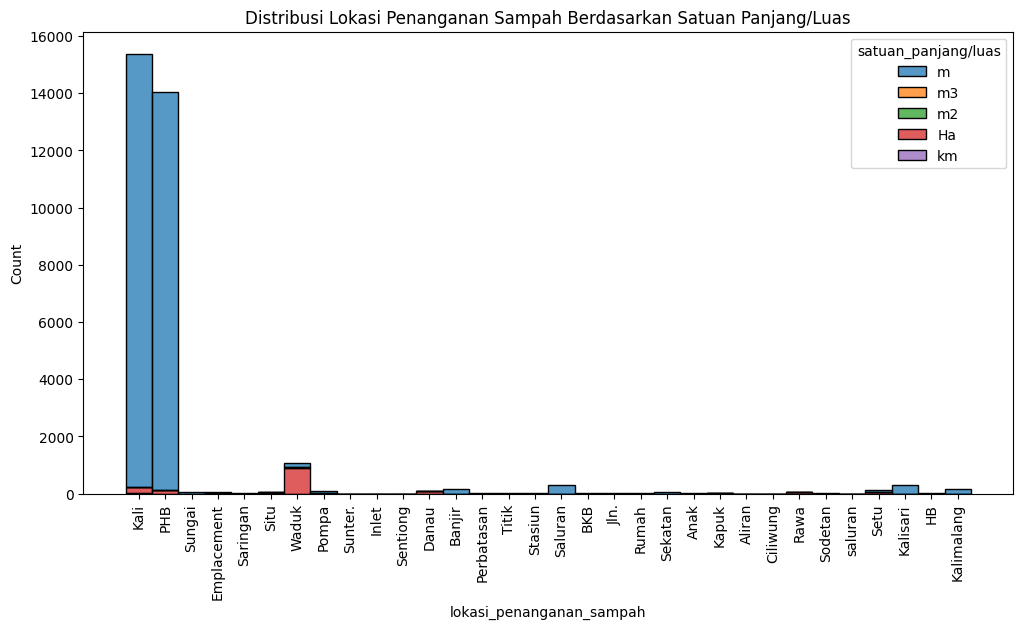

In [56]:
#persebaran setelah dilakukan pengerucutan
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lokasi_penanganan_sampah', hue='satuan_panjang/luas', multiple='stack')
plt.xticks(rotation=90)
plt.title('Distribusi Lokasi Penanganan Sampah Berdasarkan Satuan Panjang/Luas')
plt.ylabel('Count')
plt.show()

In [57]:
#memperlihatkan seberapa banyak value satuan_panjang/luas digunakan berdasarkan lokasi_penanganan_sampah setelah dilakukan pengerucutan
counts = df.groupby(['lokasi_penanganan_sampah', 'satuan_panjang/luas']).size().reset_index(name='count')
for index, row in counts.iterrows():
    print(f"{row['lokasi_penanganan_sampah']} : {row['satuan_panjang/luas']} = {row['count']}")

Anak : m = 31
BKB : m = 31
Banjir : m = 155
Danau : Ha = 93
Emplacement : m = 31
Emplacement : m3 = 31
HB : m = 31
Jln. : m = 31
Kali : Ha = 186
Kali : km = 31
Kali : m = 15169
Kalimalang : m = 155
Kalisari : m = 310
Kapuk : Ha = 31
PHB : Ha = 124
PHB : m = 13923
Perbatasan : m = 31
Pompa : Ha = 31
Pompa : m = 62
Rawa : Ha = 62
Rumah : m = 31
Saluran : m = 285
Saringan : m = 31
Sekatan : m = 62
Setu : Ha = 62
Setu : m = 62
Situ : Ha = 31
Situ : m2 = 31
Sodetan : m = 31
Stasiun : m = 35
Sungai : m = 62
Titik : m = 31
Waduk : Ha = 899
Waduk : m = 155
Waduk : m2 = 31


##### 3. Penyesuaian value dalam kolom panjang/luas dengan value pada kolom satuan_panjang/luas

In [59]:
#melihat jumlah panjang/luas dengan satuan Ha, dimana value panjang/luas melebihi 2 digit (>99.x), karena bisa jadi satuannya m
#satuan m juga bisa 2 digit, tapi dalam kasus ini biarkan tetap Ha
df_ha = df[df['satuan_panjang/luas'] == 'Ha']
more_than_2digit = df_ha['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) > 2)
len(df_ha[more_than_2digit])

0

In [60]:
equal_2digit = df_ha['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) == 2)
ha_equal_2digit = df_ha[equal_2digit][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
ha_equal_2digit.head(12)

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
346,Waduk Sunter Selatan SPBU Shell,Tanjung Priok,10,Ha,Waduk
349,Waduk Sunter Utara Bisma,Tanjung Priok,10,Ha,Waduk
350,Waduk Sunter Utara Stadion BMW,Tanjung Priok,10,Ha,Waduk
352,Waduk Sunter Utara Daikin,Tanjung Priok,10,Ha,Waduk
448,Kali Blue Park (Kali Muara),Penjaringan,15,Ha,Kali
449,Kali Junction (Kamal Muara),Penjaringan,80,Ha,Kali
672,Waduk Hankam 1 (Jl. Raya Hankam),Palmerah,24,Ha,Waduk
958,Waduk TPU Tegal Alur,Kalideres,16.617,Ha,Waduk
1034,Waduk Bojong (Jln. Belimbing),Cengkareng,18.368,Ha,Waduk
1389,Waduk Dongkal,Ciracas,32.8,Ha,Waduk


In [61]:
#melihat jumlah panjang/luas dengan satuan Ha, dimana value panjang/luas terdapat 2 misalnya (50/20)
is_it_has = df_ha['panjang/luas'].str.contains('/')
len(df_ha[is_it_has])

0

In [62]:
kali_ha = df[(df['satuan_panjang/luas'] == 'Ha') & (df['lokasi_penanganan_sampah'] == 'Kali')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
kali_ha.head(6)

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
448,Kali Blue Park (Kali Muara),Penjaringan,15,Ha,Kali
449,Kali Junction (Kamal Muara),Penjaringan,80,Ha,Kali
450,Kali Golf Land (Kamal Muara),Penjaringan,3,Ha,Kali
1164,Kali Sarua Danau L Taman margasatwa Ragunan,Pasar Minggu,2.3,Ha,Kali
1414,Kali Sunter Pondok Ranggon Ganceng,Cipayung,11.5,Ha,Kali
1695,Kali Tambun Rengas (Bendungan Merah),Cakung,3,Ha,Kali


In [63]:
phb_ha = df[(df['satuan_panjang/luas'] == 'Ha') & (df['lokasi_penanganan_sampah'] == 'PHB')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
phb_ha.head()

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
177,PHB Akses Marunda,Cilincing,1,Ha,PHB
474,PHB Kali Gendong Jembatan II,Penjaringan,2,Ha,PHB
1693,PHB Rawa Bebek Pulo Gebang,Cakung,3,Ha,PHB
1694,PHB Sosro Pulo Gebang,Cakung,5,Ha,PHB


In [64]:
danau_ha = df[(df['satuan_panjang/luas'] == 'Ha') & (df['lokasi_penanganan_sampah'] == 'Danau')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
danau_ha.head(3)

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
594,Danau Hutan Kota Srengseng,Kembangan,1.5,Ha,Danau
1165,Danau Filter Taman Margasatwa Ragunan,Pasar Minggu,1,Ha,Danau
1183,Danau Gura - gura Duren Tiga,Pancoran,1.5,Ha,Danau


In [65]:
situ_ha = df[(df['satuan_panjang/luas'] == 'Ha') & (df['lokasi_penanganan_sampah'] == 'Situ')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
situ_ha

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
589,Situ kebun bibit jl pospengumben lama srengseng,Kembangan,0.9,Ha,Situ


In [66]:
#melihat jumlah panjang/luas dengan satuan m, dimana value panjang/luas kurang dari 2 digit (<10), karena bisa jadi satuannya km (ini termasuk noise)
#bisa jadi juga satuannya Ha tetapi lebih masuk akal menggunakan km
#terdapat juga df_m yang memiliki panjang 2 digit bisa jadi m atau Ha, atau value satuan_panjang/luas lain, dalam kasus ini biarkan saja
df_m = df[df['satuan_panjang/luas'] == 'm']
less_than_2digit = df_m['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) < 2)
m_less_than_2digit = df_m[less_than_2digit][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
m_less_than_2digit.head(11)

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
745,Banjir Kanal Barat Seasons City (Jln. Inspeksi...,Tambora,2.5,m,Banjir
2449,Saluran PHB. Da'an Mogot 2 ( Jln. Da'an Mogot ...,Kebon Jeruk,1.07,m,Saluran
2450,Saluran PHB. Jln. Inspeksi Sekretaris (Pos Pol...,Kebon Jeruk,1.07,m,Saluran
2451,Kali Sekretaris ( Perbatasan Jakarta Barat dan...,Kebon Jeruk,1.172,m,Kali
2452,Kali Sekretaris ( Jln.KPBD Kavling - Jln.H.Muh...,Kebon Jeruk,1.502,m,Kali
2455,Kali Sekretaris ( Jln. Sasak Dua - Jln. Anggre...,Kebon Jeruk,1,m,Kali
2456,Kali Sekretaris ( Jln. Anggrek Cakra - Jln. Mu...,Kebon Jeruk,1.32,m,Kali
2461,Kali Villa Kelapa Dua (Jln. Pos Pengumben Raya...,Kebon Jeruk,1.359,m,Kali
2463,Kali Saluran PHB. Kebon Jeruk Baru ( Jln. Kamp...,Kebon Jeruk,1.247,m,Kali
2464,Saluran PHB Perumahan Kodam (Studio Penta SCTV...,Kebon Jeruk,1.642,m,Saluran


In [67]:
equal_2digit = df_m['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) == 2)
m_equal_2digit = df_m[equal_2digit][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
m_equal_2digit

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
684,Titik Saringan Jatipulo,Palmerah,31.5,m,Titik


In [68]:
#melihat jumlah panjang/luas dengan satuan m, dimana value panjang/luas terdapat 2 misalnya (1000/20)
is_it_has = df_m['panjang/luas'].str.contains('/')
len(df_m[is_it_has])

0

In [69]:
waduk_m = df[(df['satuan_panjang/luas'] == 'm') & (df['lokasi_penanganan_sampah'] == 'Waduk')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
waduk_m.head()

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
995,Waduk Citra 6,Kalideres,1000,m,Waduk
1415,Waduk Pondok Ranggon,Cipayung,3000,m,Waduk
1719,Waduk Rawa Badung I,Cakung,800,m,Waduk
1720,Waduk Rawa Badung II,Cakung,800,m,Waduk
1743,Waduk Aneka Elok,Cakung,700,m,Waduk


In [70]:
danau_m = df[(df['satuan_panjang/luas'] == 'm') & (df['lokasi_penanganan_sampah'] == 'Danau')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
danau_m.head(5)

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah


In [71]:
emplacement_m = df[(df['satuan_panjang/luas'] == 'm') & (df['lokasi_penanganan_sampah'] == 'Emplacement')][['titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
emplacement_m

,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
744,Emplacement Rumah Pompa Cibubur,Tambora,Jakarta Barat,200,m,Emplacement


In [72]:
#melihat jumlah panjang/luas dengan satuan m2, dimana value panjang/luas melebihi 2 digit (>99.x), karena bisa jadi satuannya m
df_m2 = df[df['satuan_panjang/luas'] == 'm2']
more_than_2digit = df_m2['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) > 2)
len(df_m2[more_than_2digit])

0

In [73]:
equal_2digit = df_m2['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) == 2)
df_m2[equal_2digit].head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3),lokasi_penanganan_sampah
85,1,Situ Lembang,Menteng,Jakarta Pusat,14.15,m2,1,12,Situ
1838,1,Situ Lembang,Menteng,Jakarta Pusat,14.15,m2,2,12,Situ
3591,1,Situ Lembang,Menteng,Jakarta Pusat,14.15,m2,3,0,Situ
5344,1,Situ Lembang,Menteng,Jakarta Pusat,14.15,m2,4,12,Situ
7097,1,Situ Lembang,Menteng,Jakarta Pusat,14.15,m2,5,12,Situ


In [74]:
situ_m2 = df[(df['satuan_panjang/luas'] == 'm2') & (df['lokasi_penanganan_sampah'] == 'Situ')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
situ_m2
#13.288 m2 dr brosur

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
85,Situ Lembang,Menteng,14.15,m2,Situ


In [75]:
waduk_m2 = df[(df['satuan_panjang/luas'] == 'm2') & (df['lokasi_penanganan_sampah'] == 'Waduk')][['titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
waduk_m2
#4.9 Ha dr brosur

,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
98,Waduk Melati WM,Tanah Abang,Jakarta Pusat,6,m2,Waduk


In [76]:
#melihat jumlah panjang/luas dengan satuan m2, dimana value panjang/luas terdapat 2 misalnya (50/20)
is_it_has = df_m2['panjang/luas'].str.contains('/')
len(df_m2[is_it_has])

0

In [77]:
#melihat jumlah panjang/luas dengan satuan m3, dimana value panjang/luas melebihi 1 digit (>9.x), karena bisa jadi satuannya Ha,m2 atau m
df_m3 = df[df['satuan_panjang/luas'] == 'm3']
more_than_1digit = df_m3['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) > 1)
len(df_m3[more_than_1digit])

0

In [78]:
emplacement_m3 = df[(df['satuan_panjang/luas'] == 'm3') & (df['lokasi_penanganan_sampah'] == 'Emplacement')][['titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
emplacement_m3
#1.433m rata-rata panjang emplasmen

,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
56,Emplasment Pompa Cideng,Gambir,Jakarta Pusat,4,m3,Emplacement


In [79]:
#melihat jumlah panjang/luas dengan satuan m2, dimana value panjang/luas terdapat 2 misalnya (9/2.5)
is_it_has = df_m3['panjang/luas'].str.contains('/')
len(df_m3[is_it_has])

0

In [80]:
#melihat jumlah panjang/luas dengan satuan km, dimana value panjang/luas melebihi 1 digit (>9.x), karena bisa jadi satuannya Ha,m2 atau m
df_km = df[df['satuan_panjang/luas'] == 'km']
more_than_1digit = df_km['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) > 1)
len(df_km[more_than_1digit])

0

In [81]:
#melihat jumlah panjang/luas dengan satuan km, dimana value panjang/luas terdapat 2 misalnya (9/2.5)
is_it_has = df_km['panjang/luas'].str.contains('/')
len(df_km[is_it_has])

0

#### satuan_panjang/luas Column Exploration

In [83]:
#menampilkan semua baris dimana volume_sampah_perhari(m3) memiliki garbage value
df_cons_strip_vsp.head()

,bulan,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,tanggal,volume_sampah_perhari(m3)
24,1,PHB Cempaka Putih Indah,Cempaka Putih,Jakarta Pusat,210,m,1,-
25,1,PHB Cempaka Putih Barat 25,Cempaka Putih,Jakarta Pusat,220,m,1,-
26,1,PHB Suprapto Bea Cukai,Cempaka Putih,Jakarta Pusat,680,m,1,-
27,1,PHB Rawa Kerbau Cempaka Warna,Cempaka Putih,Jakarta Pusat,550,m,1,-
30,1,Kali / Sungai Ciliwung Ruas Belakang Kemenkeu,Gambir,Jakarta Pusat,1000,m,1,-


<Axes: xlabel='volume_sampah_perhari(m3)', ylabel='Count'>

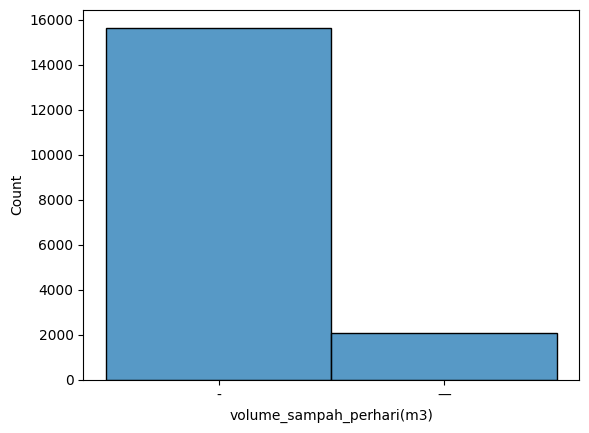

In [84]:
#melihat persebaran garbage value volume_sampah_perhari(m3)
sns.histplot(df_cons_strip_vsp['volume_sampah_perhari(m3)'])

# Garbage and Noise Value Treatments Using Mode,Mean and Manual Fill

#### panjang/luas Garbage and Noise Value Treatments

##### 1. Mengupdate Garbage value

###### 1.a. Mengupdate manual Garbage Value

Keterangan isi manual (sumber internet) :

PHB Tanah Merdeka = 426
PHB Gang Sate = 
PHB Pos 5 = 608
PHB Pintu Dua Pegangsaan Kel. Sukapura = 2000
Inlet 1 Waduk Rawa Badak = 100
Inlet 2 Waduk Rawa Badak = 100
PHB PIK = 3099
PHB Vikamas = 300
PHB Muara Karang Selatan = 1098
Kali Besar Kel. Penjaringan = 
Saringan Meh Perintis Kemerdekaan UPK Badan Air = 400 (rata-rata panjang saringan sampah)


In [90]:
df[df['lokasi_penanganan_sampah'] == 'Saringan']['panjang/luas'].mode()

0        -
1      400
2    400/8
Name: panjang/luas, dtype: object

In [91]:
#mengganti garbage value secara manual dengan mencari data terkait panjang/luas titik lokasi
locations_to_update = {
    'PHB Tanah Merdeka': 426,
    'PHB Pos 5': 608,
    'PHB Pintu Dua Pegangsaan Kel. Sukapura': 2000,
    'Inlet 1 Waduk Rawa Badak': 100,
    'Inlet 2 Waduk Rawa Badak': 100,
    'PHB PIK': 3099,
    'PHB Vikamas': 300,
    'PHB Muara Karang Selatan':1098,
    'Saringan Meh Perintis Kemerdekaan UPK Badan Air': 400
}
for lokasi, panjang_luas in locations_to_update.items():
    df.loc[df['titik_lokasi'] == lokasi, 'panjang/luas'] = panjang_luas
    print(f"{lokasi}: {len(df[df['titik_lokasi'] == lokasi])}")

PHB Tanah Merdeka: 31
PHB Pos 5: 31
PHB Pintu Dua Pegangsaan Kel. Sukapura: 31
Inlet 1 Waduk Rawa Badak: 31
Inlet 2 Waduk Rawa Badak: 31
PHB PIK: 31
PHB Vikamas: 31
PHB Muara Karang Selatan: 31
Saringan Meh Perintis Kemerdekaan UPK Badan Air: 31


In [92]:
#mengidentifikasi sisa garbage value pada kolom panjang/luas
df_cons_strip_pl = df[
    (df['panjang/luas'].str.contains('-', na=False)) | 
    (df['panjang/luas'].str.contains('—', na=False))
]
print(df_cons_strip_pl)

       bulan                 titik_lokasi    kecamatan        wilayah  \
171        1                PHB Gang Sate    Cilincing  Jakarta Utara   
483        1  Kali Besar Kel. Penjaringan  Penjaringan  Jakarta Utara   
1924       1                PHB Gang Sate    Cilincing  Jakarta Utara   
2236       1  Kali Besar Kel. Penjaringan  Penjaringan  Jakarta Utara   
3677       1                PHB Gang Sate    Cilincing  Jakarta Utara   
...      ...                          ...          ...            ...   
49567      1  Kali Besar Kel. Penjaringan  Penjaringan  Jakarta Utara   
51008      1                PHB Gang Sate    Cilincing  Jakarta Utara   
51320      1  Kali Besar Kel. Penjaringan  Penjaringan  Jakarta Utara   
52761      1                PHB Gang Sate    Cilincing  Jakarta Utara   
53073      1  Kali Besar Kel. Penjaringan  Penjaringan  Jakarta Utara   

      panjang/luas satuan_panjang/luas  tanggal volume_sampah_perhari(m3)  \
171         Oct-00                 NaN        

###### 1.b. Mengupdate Garbage Value dengan nilai modulus pada panjang/luas berdasarkan lokasi_penanganan_sampah

In [94]:
#mengganti garbage value yang belum didapatkan dengan modulus value panjang/luas berdasarkan lokasi_penanganan_sampah
df.loc[df_cons_strip_pl.index, 'panjang/luas'] = df.groupby('lokasi_penanganan_sampah')['panjang/luas'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
print(df.loc[df_cons_strip_pl.index, 'panjang/luas'])

171       500
483      1000
1924      500
2236     1000
3677      500
         ... 
49567    1000
51008     500
51320    1000
52761     500
53073    1000
Name: panjang/luas, Length: 62, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_12648\3549900973.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  df.loc[df_cons_strip_pl.index, 'panjang/luas'] = df.groupby('lokasi_penanganan_sampah')['panjang/luas'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


##### 2. Mengupdate Noise value (contains '/')

In [97]:
#mengambil value pada sebelah kiri '/'
df['panjang/luas'] = df['panjang/luas'].str.split('/').str[0]

##### 3. Mengupdate Noise value (contains 'm')

In [99]:
#mengambil value pada sebelah kiri 'm'
df['panjang/luas'] = df['panjang/luas'].str.split('m').str[0]

##### 4. Mengupdate Noise value (contains 'Ha')

In [101]:
#mengambil value pada sebelah kiri 'Ha'
df['panjang/luas'] = df['panjang/luas'].str.split('Ha').str[0]

In [102]:
df.describe(include="object")

,titik_lokasi,kecamatan,wilayah,panjang/luas,satuan_panjang/luas,volume_sampah_perhari(m3),lokasi_penanganan_sampah
count,54343,54343,54343,53196,32388,54343,54343
unique,1747,42,5,263,5,59,32
top,Saluran PHB Asem,Kalideres,Jakarta Barat,1000,m,-,Kali
freq,62,2914,16430,8403,30745,15649,22227


#### satuan_panjang/luas Noise Value Treatments

In [104]:
#mengganti value satuan_panjang/luas m2 dimana value panjang/luas kurang dari 2 digit menjadi km
df.loc[df_m[less_than_2digit].index, 'satuan_panjang/luas'] = 'km'
print(df.loc[df_m[less_than_2digit].index, 'satuan_panjang/luas'])

745      km
2449     km
2450     km
2451     km
2452     km
         ..
53298    km
53300    km
53301    km
53302    km
53335    km
Name: satuan_panjang/luas, Length: 331, dtype: object


In [105]:
#mengganti value satuan_panjang/luas m dimana value panjang/luas tidak sesuai menjadi Ha
df.loc[(df['titik_lokasi'] == 'Waduk Melati WM') & (df['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) < 2)), 'satuan_panjang/luas'] = 'Ha'
print(len(df.loc[df['titik_lokasi'] == 'Waduk Melati WM', ['panjang/luas', 'satuan_panjang/luas']]))

31


#### volume_sampah_perhari(m3) Noise Value Treatments

##### 1. unidentified fonts noise

In [108]:
# Mengganti value O.5 (font asing) dengan value '0.5' pada kolom 'volume_sampah_perhari(m3)'
df_cons_unidentified_font = df['volume_sampah_perhari(m3)'] == 'O.5'
df.loc[df_cons_unidentified_font, 'volume_sampah_perhari(m3)'] = '0.5'
print(df.loc[df_cons_unidentified_font, 'volume_sampah_perhari(m3)'])

46881    0.5
Name: volume_sampah_perhari(m3), dtype: object


##### 2. space noise

In [110]:
# Mengganti value spasi(' ') dengan value - pada kolom 'volume_sampah_perhari(m3)'
df_cons_space = df['volume_sampah_perhari(m3)'] == ' '
df.loc[df_cons_space, 'volume_sampah_perhari(m3)'] = '-'
print(df.loc[df_cons_space, 'volume_sampah_perhari(m3)'])

590      -
7333     -
35668    -
Name: volume_sampah_perhari(m3), dtype: object


# Missing Value Treatments using Mode, Manual Fill for panjang/luas column, and Most Frequent Unit for satuan_panjang/luas and using KNN for volume_sampah_perhari(m3)

#### panjang/luas Missing Value Treatments

In [113]:
#karena titik_lokasi yang memiliki panjang/luas NaN semuanya adalah Saringan sampah, maka gunakan rata-rata atau modulus terbanyak saringan yaitu 400
df_null_pl = df[df['panjang/luas'].isnull()]
df.loc[df_null_pl.index, 'panjang/luas'] = '400'
print(df.loc[df_null_pl.index, 'panjang/luas'])

71       400
87       400
170      400
174      400
186      400
        ... 
54107    400
54108    400
54109    400
54110    400
54269    400
Name: panjang/luas, Length: 1147, dtype: object


#### satuan_panjang/luas Missing Value Treatments

In [115]:
#mengelompokan null value satuan_panjang/luas
df_null_spl = df[df['satuan_panjang/luas'].isnull()]
print(len(df_null_spl))

21955


In [116]:
#jika null value memiliki panjang/luas lebih dari 2 digit maka null value di isi dengan satuan m
more_than_2digit_null = df_null_spl['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) > 2)
df.loc[df_null_spl[more_than_2digit_null].index, 'satuan_panjang/luas'] = 'm'
print(df.loc[df_null_spl[more_than_2digit_null].index, 'satuan_panjang/luas'])

71       m
87       m
152      m
153      m
154      m
        ..
54107    m
54108    m
54109    m
54110    m
54269    m
Name: satuan_panjang/luas, Length: 21322, dtype: object


In [117]:
#melihat missing value pada satuan_panjang/luas
#melihat lokasi yang terdapat missing value pada  panjang/luas
null_lokasi = df[df['satuan_panjang/luas'].isnull()][['titik_lokasi', 'kecamatan', 'wilayah', 'panjang/luas','lokasi_penanganan_sampah']].drop_duplicates()
null_lokasi.head(21)

,titik_lokasi,kecamatan,wilayah,panjang/luas,lokasi_penanganan_sampah
312,Kali Lagoa Kanal Saringan JICT,Koja,Jakarta Utara,50,Kali
1218,Waduk Timur Setiabudi,Setiabudi,Jakarta Selatan,1,Waduk
1220,Waduk Barat Setiabudi,Setiabudi,Jakarta Selatan,1,Waduk
2470,Kali Pesanggrahan ( Jln. Pos Pengumben Raya - ...,Kebon Jeruk,Jakarta Barat,1.82,Kali
2471,Kali Pesanggrahan (Jln. H. Kelik Hutan Kota Sr...,Kebon Jeruk,Jakarta Barat,1.2,Kali
2472,Kali Pesanggrahan ( Komplek Villa Arteri Kebon...,Kebon Jeruk,Jakarta Barat,1.35,Kali
2473,Kali Pesanggrahan ( Pintu Air Kedoya Selatan -...,Kebon Jeruk,Jakarta Barat,1.3,Kali
2474,Kali Pesanggrahan ( Perumahan Weslling Jln. Ga...,Kebon Jeruk,Jakarta Barat,1.3,Kali
2476,Kali Saluran PHB.Komplek Green Garden (Jln. Ba...,Kebon Jeruk,Jakarta Barat,2.7,Kali
2477,Kali Saluran PHB. Al Kamal (Masjid Al Kamal Jl...,Kebon Jeruk,Jakarta Barat,1.55,Kali


In [118]:
#jika null value memiliki panjang/luas sama dengan 2 digit maka value bisa saja m atau Ha atau m2 tergantung mana yang paling sering muncul
#sebenarnya bisa di beri batasan panjang/luas minimal jika lokasi_penanganan_sampah adalah Kali, Sungai, dan PHB adalah 20
#tetapi karena null value memiliki lokasi_penanganan_sampah = Kali dengan panjang/luas = 50, jadi tidak perlu membuat batasan
# Mengidentifikasi null value yang memiliki panjang/luas sama dengan 2
equal_2digit_null = df_null_spl['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) == 2)
def choose_most_frequent_unit(x):
    count_m = (x == 'm').sum()
    count_ha = (x == 'Ha').sum()
    count_m2 = (x == 'm2').sum()

    if count_m >= max(count_ha, count_m2):
        return 'm'
    elif count_ha >= max(count_m, count_m2):
        return 'Ha'
    else:
        return 'm2'

df.loc[df_null_spl.index[equal_2digit_null], 'satuan_panjang/luas'] = df_null_spl.groupby('lokasi_penanganan_sampah')['satuan_panjang/luas'].transform(choose_most_frequent_unit)
print(df.loc[df_null_spl.index[equal_2digit_null], ['lokasi_penanganan_sampah', 'panjang/luas', 'satuan_panjang/luas']])

      lokasi_penanganan_sampah panjang/luas satuan_panjang/luas
312                       Kali           50                   m
2065                      Kali           50                   m
3818                      Kali           50                   m
5571                      Kali           50                   m
7324                      Kali           50                   m
9077                      Kali           50                   m
10830                     Kali           50                   m
12583                     Kali           50                   m
14336                     Kali           50                   m
16089                     Kali           50                   m
17842                     Kali           50                   m
19595                     Kali           50                   m
21348                     Kali           50                   m
23101                     Kali           50                   m
24854                     Kali          

In [119]:
#jika null value memiliki panjang/luas kurang dari 2 digit maka null value dapat diisi dengan Ha, m2, km atau m3
less_than_2digit_null = df_null_spl['panjang/luas'].apply(lambda x: len(str(x).split('.')[0]) < 2)

def choose_most_frequent_unit(x):
    count_ha = (x == 'Ha').sum()
    count_m2 = (x == 'm2').sum()
    count_km = (x == 'km').sum()
    count_m3 = (x == 'm3').sum()
        
    if count_ha >= max(count_m2, count_km, count_m3):
        return 'Ha'
    elif count_m2 >= max(count_ha, count_km, count_m3):
        return 'm2'
    elif count_km >= max(count_ha, count_m2, count_m3):
        return 'km'
    else:
        return 'm3'

df.loc[df_null_spl.index[less_than_2digit_null], 'satuan_panjang/luas'] = df_null_spl.groupby('lokasi_penanganan_sampah')['satuan_panjang/luas'].transform(choose_most_frequent_unit)
print(df.loc[df_null_spl.index[less_than_2digit_null], ['titik_lokasi', 'panjang/luas', 'satuan_panjang/luas']])

                                            titik_lokasi panjang/luas  \
1218                               Waduk Timur Setiabudi            1   
1220                               Waduk Barat Setiabudi            1   
2470   Kali Pesanggrahan ( Jln. Pos Pengumben Raya - ...         1.82   
2471   Kali Pesanggrahan (Jln. H. Kelik Hutan Kota Sr...          1.2   
2472   Kali Pesanggrahan ( Komplek Villa Arteri Kebon...         1.35   
...                                                  ...          ...   
53325        PHB. Adhikarya Jln.Adhikarya Kedoya Selatan        1.102   
53326                             Saluran PHB. Mangga 17            1   
53327                             Saluran PHB. Mangga 18          1.2   
53808                              Waduk Timur Setiabudi            1   
53810                              Waduk Barat Setiabudi            1   

      satuan_panjang/luas  
1218                   Ha  
1220                   Ha  
2470                   Ha  
2471       

#### Re-check the Result

In [121]:
#mengecek perubahan jumlah pengunaan satuan berdasarkan lokasi_penanganan_sampah
counts = df.groupby(['lokasi_penanganan_sampah', 'satuan_panjang/luas']).size().reset_index(name='count')
for index, row in counts.iterrows():
    print(f"{row['lokasi_penanganan_sampah']} : {row['satuan_panjang/luas']} = {row['count']}")

Aliran : m = 155
Anak : m = 31
BKB : m = 31
Banjir : km = 31
Banjir : m = 124
Ciliwung : m = 372
Danau : Ha = 93
Danau : m = 155
Emplacement : m = 62
Emplacement : m3 = 31
HB : m = 31
Inlet : m = 62
Jln. : m = 31
Kali : Ha = 426
Kali : km = 211
Kali : m = 21590
Kalimalang : m = 155
Kalisari : m = 310
Kapuk : Ha = 31
PHB : Ha = 154
PHB : m = 22073
Perbatasan : m = 31
Pompa : Ha = 31
Pompa : m = 62
Rawa : Ha = 62
Rumah : m = 31
Saluran : Ha = 180
Saluran : km = 120
Saluran : m = 4443
Saringan : m = 961
Sekatan : m = 62
Sentiong : m = 31
Setu : Ha = 62
Setu : m = 62
Situ : Ha = 31
Situ : m2 = 31
Sodetan : m = 62
Stasiun : Ha = 90
Stasiun : m = 65
Sungai : m = 62
Sunter. : m = 31
Titik : m = 31
Waduk : Ha = 992
Waduk : m = 403
saluran : m = 248


In [122]:
#mengecek kesdesuaian data
danau_m = df[(df['satuan_panjang/luas'] == 'm') & (df['lokasi_penanganan_sampah'] == 'Danau')][['titik_lokasi', 'kecamatan', 'panjang/luas', 'satuan_panjang/luas', 'lokasi_penanganan_sampah']].drop_duplicates()
danau_m.head()

,titik_lokasi,kecamatan,panjang/luas,satuan_panjang/luas,lokasi_penanganan_sampah
1163,Danau Poncol BPP Pertanian - Kelurahan Ragunan,Pasar Minggu,1000,m,Danau
1168,Danau Taman Makam Pahlawan Kalibata,Pancoran,500,m,Danau
1332,Danau Emen,Kebayoran Lama,500,m,Danau
1333,Danau PU,Kebayoran Lama,700,m,Danau
1365,Danau Kapalio,Pesanggrahan,1000,m,Danau


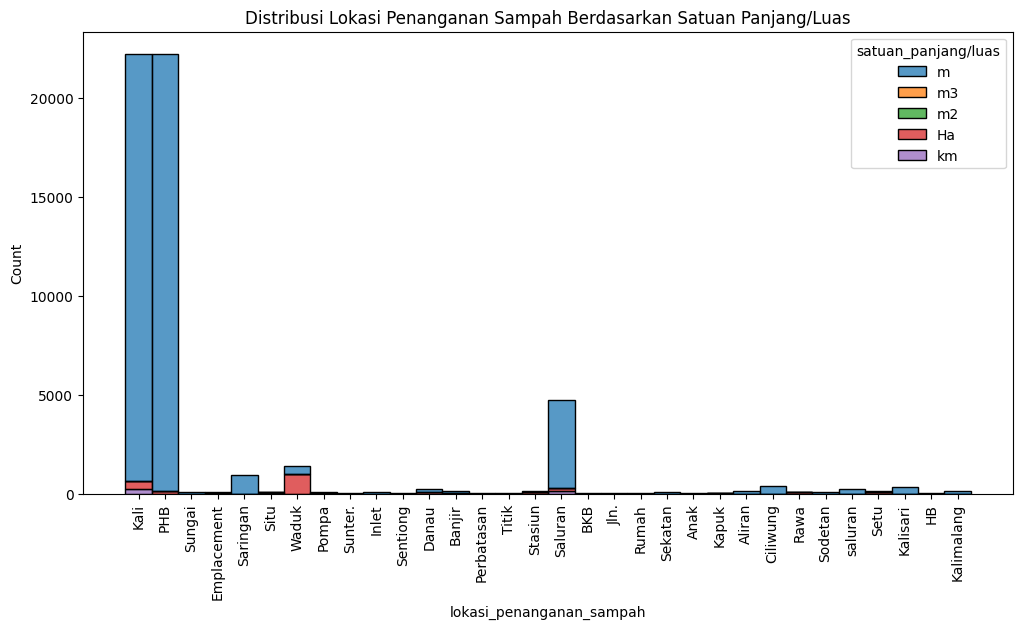

In [123]:
#persebaran 
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lokasi_penanganan_sampah', hue='satuan_panjang/luas', multiple='stack')
plt.xticks(rotation=90)
plt.title('Distribusi Lokasi Penanganan Sampah Berdasarkan Satuan Panjang/Luas')
plt.ylabel('Count')
plt.show()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bulan                      54343 non-null  int64 
 1   titik_lokasi               54343 non-null  object
 2   kecamatan                  54343 non-null  object
 3   wilayah                    54343 non-null  object
 4   panjang/luas               54343 non-null  object
 5   satuan_panjang/luas        54343 non-null  object
 6   tanggal                    54343 non-null  int64 
 7   volume_sampah_perhari(m3)  54343 non-null  object
 8   lokasi_penanganan_sampah   54343 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


#### Convert Data Type

In [126]:
#mengonversi data type panjang/luas dari object ke numeric berupa float
df['panjang/luas'] = pd.to_numeric(df['panjang/luas'], errors='coerce')

In [127]:
#mengonversi data type volume_sampah_perhari(m3) dari object ke numeric berupa float, dan membuat NaN pada kolom untuk di prediksi
df['volume_sampah_perhari(m3)'] = pd.to_numeric(df['volume_sampah_perhari(m3)'], errors='coerce')

In [128]:
#melakukan pengecekan persentase missing value setelah mengubah data type
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

bulan                         0.000000
titik_lokasi                  0.000000
kecamatan                     0.000000
wilayah                       0.000000
panjang/luas                  0.000000
satuan_panjang/luas           0.000000
tanggal                       0.000000
volume_sampah_perhari(m3)    32.574573
lokasi_penanganan_sampah      0.000000
dtype: float64


#### volume_sampah_perhari(m3) Missing Value Treatments Using KNN

In [130]:
from sklearn.impute import KNNImputer
impute = KNNImputer()

In [131]:
#menggunakan KNN untuk mengisi null dengan tipe data numeric, dengan melihat pola pada data
for i in df.select_dtypes(include="number").columns:
    df[i] = impute.fit_transform(df[[i]])

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54343 entries, 0 to 54342
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bulan                      54343 non-null  float64
 1   titik_lokasi               54343 non-null  object 
 2   kecamatan                  54343 non-null  object 
 3   wilayah                    54343 non-null  object 
 4   panjang/luas               54343 non-null  float64
 5   satuan_panjang/luas        54343 non-null  object 
 6   tanggal                    54343 non-null  float64
 7   volume_sampah_perhari(m3)  54343 non-null  float64
 8   lokasi_penanganan_sampah   54343 non-null  object 
dtypes: float64(4), object(5)
memory usage: 3.7+ MB


In [133]:
df.to_csv('105222022_Preprocessing.csv', index=False)